# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(참조)

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.
* 활용하지 않는 변수를 index 화 해주세요.

In [7]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
# 한글 세팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

In [9]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [11]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.

data.head(5)

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [12]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.

data.tail()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11995,11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11996,11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11997,11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11998,11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,...,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,...,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [13]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)
data.shape

(12000, 21)

In [14]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [15]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자

data.describe()

,CID,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,6000.50000,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,3464.24595,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.00000,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3000.75000,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,6000.50000,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,9000.25000,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,12000.00000,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


In [16]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.

data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 파인애플사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 crosstab을 통해서 탐색해 보자!

In [21]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)

data[['AGE','고용상태','교육수준','상품타입','거주지사이즈','자동차']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     12000 non-null  int64 
 1   고용상태    12000 non-null  object
 2   교육수준    12000 non-null  object
 3   상품타입    12000 non-null  object
 4   거주지사이즈  12000 non-null  object
 5   자동차     12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

### 1) AGE

In [24]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index())

data['AGE'].value_counts(normalize = True).sort_index()

AGE
1    0.121167
2    0.128167
3    0.397917
4    0.260333
5    0.088083
6    0.004333
Name: proportion, dtype: float64

<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [26]:
# 연령대를 보았을 때 약 40% 정도가 40대 임을 알 수 있다. 약 4~50대가 65% 정도이다.

C:\Users\User\AppData\Local\Temp\ipykernel_15304\4033605551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AGE', data = data, palette='Set2')


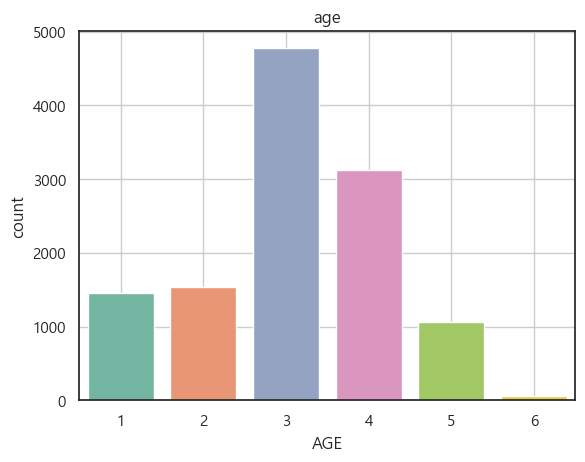

In [27]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE', data = data, palette='Set2')
plt.title('age')
plt.grid()
plt.show()

### 2) 고용상태

In [29]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.
data['고용상태'].value_counts().sort_index()

고용상태
FALSE     360
고용       7518
무직       3028
휴직       1094
Name: count, dtype: int64

In [30]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.

data['고용상태'].value_counts(normalize = True).sort_index()

고용상태
FALSE    0.030000
고용       0.626500
무직       0.252333
휴직       0.091167
Name: proportion, dtype: float64

In [31]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?

# 수집 거부, 오류등 수집 실패

# 보관기관이 오래되어 신뢰성, 법적 문제로 삭제?????????
# 

<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


In [33]:
# 1. 재직자 비율이 압도적으로 많다.
# 2. 무직자 비율이 2번째로 많은데 이중 대부분은 5~70대로 예상됨 (아니네...
# 3. 

In [255]:
pd.crosstab(index=data['AGE'], columns=data['고용상태'] ,normalize=True)

고용상태,FALSE,고용,무직,휴직
AGE,,,,
1,0.000000,0.121167,0.000000,0.000000
2,0.001250,0.075000,0.042333,0.009583
3,0.015667,0.120333,0.210000,0.051917
4,0.013083,0.217583,0.000000,0.029667
5,0.000000,0.088083,0.000000,0.000000
6,0.000000,0.004333,0.000000,0.000000


C:\Users\User\AppData\Local\Temp\ipykernel_15304\487995835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='고용상태', data = data, palette='Set1')


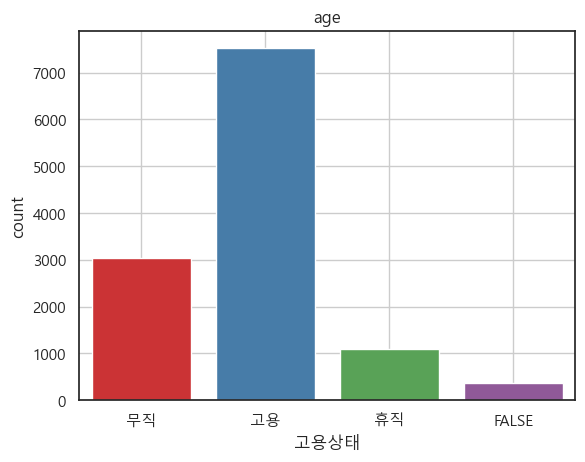

In [34]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='고용상태', data = data, palette='Set1')
plt.title('age')
plt.grid()
plt.show()

### 3) 교육수준

In [36]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.

data['교육수준'].value_counts().sort_index()

교육수준
고졸이하    3477
대학졸업    7105
박사       439
석사       979
Name: count, dtype: int64

In [37]:
#[문제 13] 위 결과에 대해 비율로 계산해보자.

data['교육수준'].value_counts(normalize = True).sort_index()

교육수준
고졸이하    0.289750
대학졸업    0.592083
박사      0.036583
석사      0.081583
Name: proportion, dtype: float64

<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 1. 대졸자가 가장 높다 # 자료가 없다...
# 2. 

C:\Users\User\AppData\Local\Temp\ipykernel_15304\89406935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='교육수준', data = data, palette='Set1')


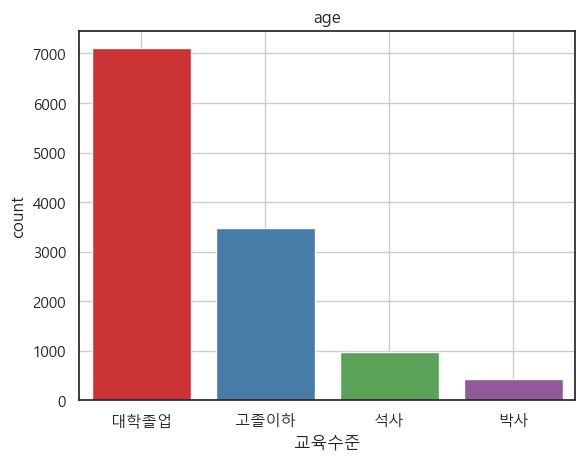

In [39]:
#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='교육수준', data = data, palette='Set1')
plt.title('age')
plt.grid()
plt.show()

### 4) 상품타입

In [41]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.

data['상품타입'].value_counts(normalize = True).sort_index()

상품타입
고급    0.089583
기본    0.606500
중급    0.303917
Name: proportion, dtype: float64

<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 1. 기본 타입의 상품이 제일 많다 > 혜택이 충분하다, 보험은 불확실성?

C:\Users\User\AppData\Local\Temp\ipykernel_15304\1746830653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='상품타입', data = data, palette='Set1')


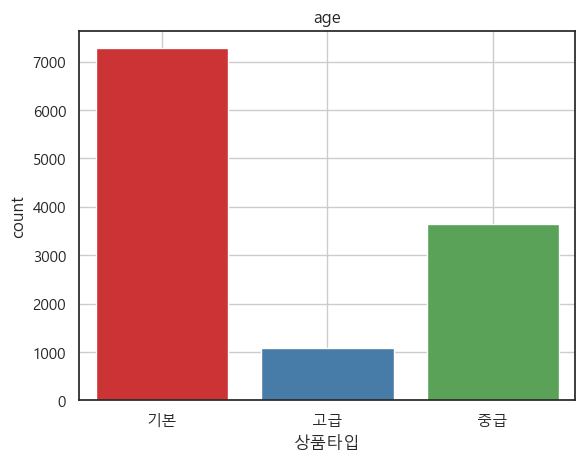

In [43]:
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='상품타입', data = data, palette='Set1')
plt.title('age')
plt.grid()
plt.show()

### 5) 거주지사이즈

In [45]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.

data['거주지사이즈'].value_counts(normalize = True).sort_index()

거주지사이즈
대    0.103750
소    0.194333
중    0.701917
Name: proportion, dtype: float64

<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 보험은 대부분의 사람들이 가입하기 떄문에, 중산층이 가장 높은 비율을 차지할 것으로 예상되어 거주지 사이즈 또한 중간크기가 많다

C:\Users\User\AppData\Local\Temp\ipykernel_15304\463097623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='거주지사이즈', data = data, palette='Set1')


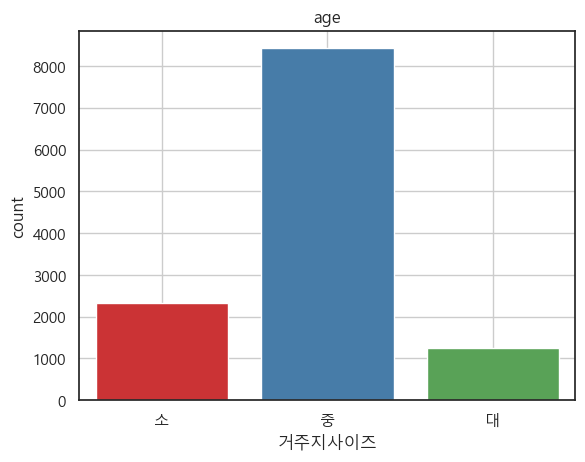

In [47]:
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='거주지사이즈', data = data, palette='Set1')
plt.title('age')
plt.grid()
plt.show()

### 6) 자동차

In [49]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.

data['자동차'].value_counts(normalize = True).sort_index()

자동차
SUV     0.194667
고급차     0.037833
스포츠카    0.054333
일반세단    0.506167
컴팩트카    0.207000
Name: proportion, dtype: float64

<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 보험은 대부분의 사람들이 가입하기 떄문에, 중산층이 가장 높은 비율을 차지할 것으로 예상됨
# 스포츠카 전용 보험준비? > 50대가 많이 탄다..

C:\Users\User\AppData\Local\Temp\ipykernel_15304\3933266074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='자동차', data = data, palette='Set1')


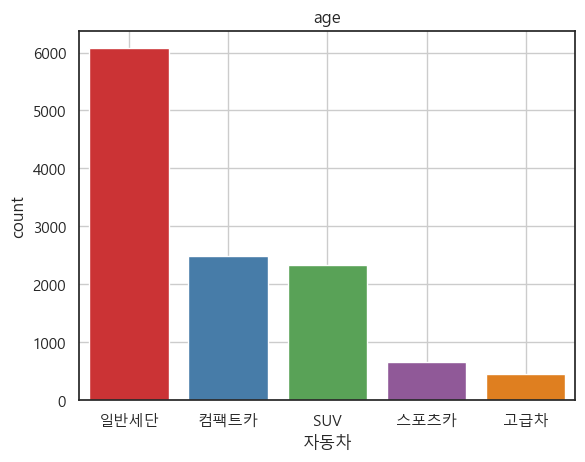

In [51]:
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='자동차', data = data, palette='Set1')
plt.title('age')
plt.grid()
plt.show()

## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 crosstab, histplot 을 통해서 탐색해 보자

In [53]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)

data[['Willingness to pay/Stay', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Willingness to pay/Stay  12000 non-null  float64
 1   소득                       12000 non-null  int64  
 2   월 납입액                    12000 non-null  int64  
 3   타 상품 보유 현황               12000 non-null  object 
 4   총지불금액                    12000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 468.9+ KB


### 1) WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


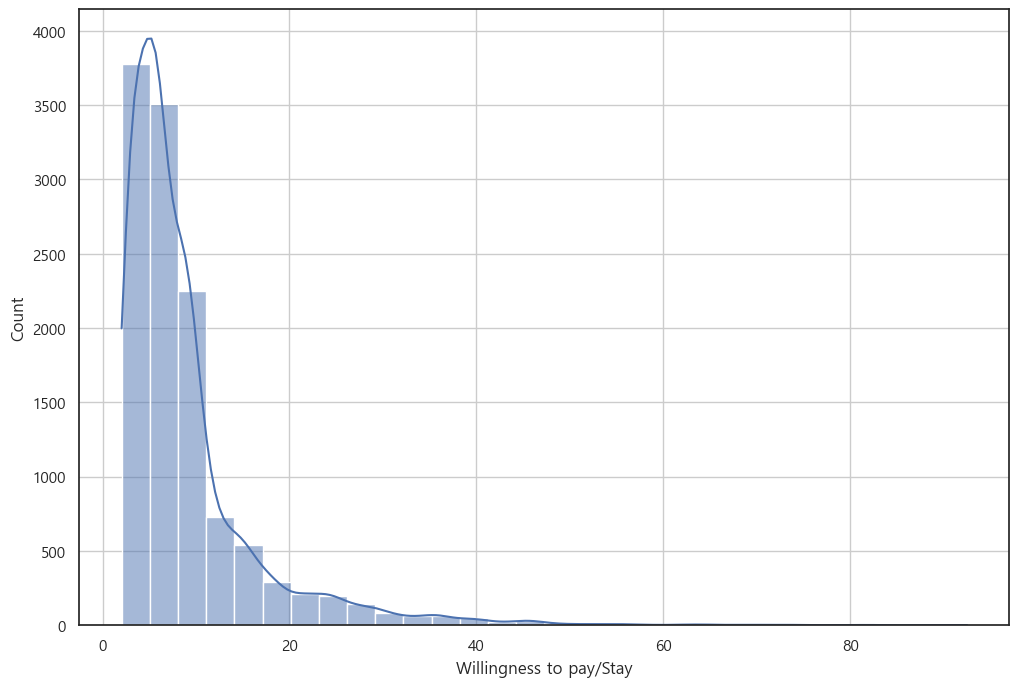

In [55]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기

plt.figure(figsize=(12,8))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.grid()
plt.show()

- bins는 막대개수 조정/ kde 는 커널밀도 추정(분포 곡선)

In [57]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)
feature = 'Willingness to pay/Stay'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
Willingness to pay/Stay,12000.0,8.859478,7.698885,2.04573,4.3734,6.384831,9.8679,92.4963


<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [59]:
# 대부분의 고객의 경우 보험유지기대지표(WTP)의 값이 낮게 나옴(0~10정도 사이가 대부분)
# 평균값을 확인해보니 8 정도로 낮은 것으로 알 수 있음.
# 왜 낮을까?

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

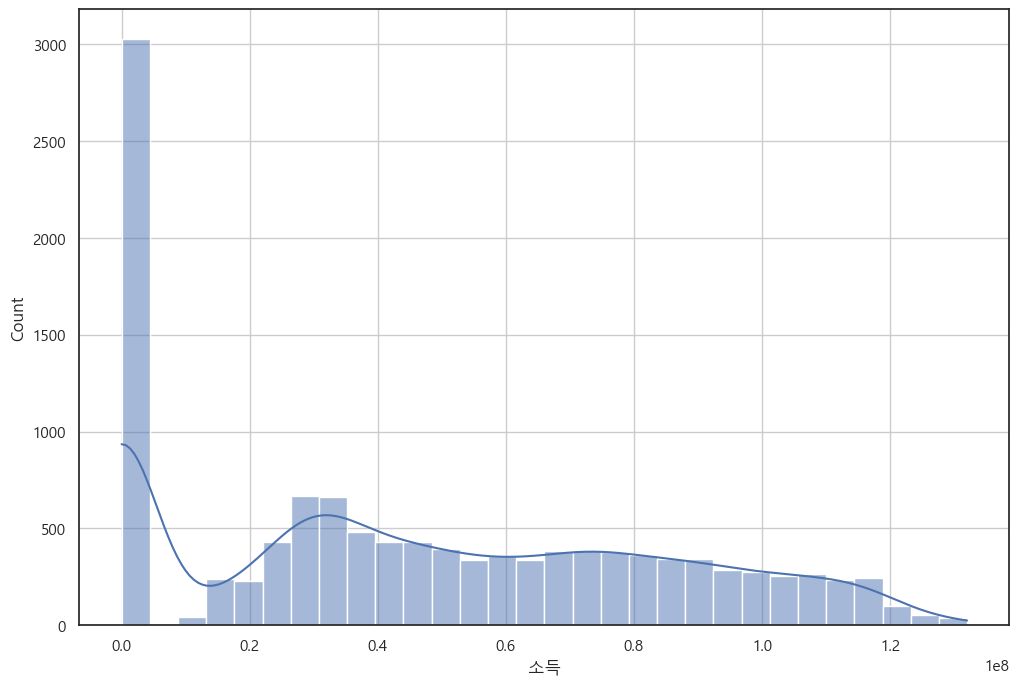

In [61]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['소득'],bins=30,kde=True)
plt.grid()
plt.show()

<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [222]:
data.loc[data['고용상태']!='FALSE']['고용상태'].value_counts(normalize = True).sort_index()

고용상태
고용    0.645876
무직    0.260137
휴직    0.093986
Name: proportion, dtype: float64

In [226]:
# 소득이 0인 사람의 비율이 압도적으로 많지만, 소득 유무로 나눈다면 있다 비율이 높음
소득없 = data.loc[data['소득'] == 0]['소득'].value_counts().sum()
소득있 = data.loc[data['소득'] > 0]['소득'].value_counts().sum()



print('소득 없음:',소득없)
print('소득 있음:',소득있)
print(소득없/(소득없+소득있))
print(소득있/(소득없+소득있))

0.645876+0.093986

소득 없음: 3028
소득 있음: 8972
0.25233333333333335
0.7476666666666667


0.739862

In [218]:
print(data.loc[data['고용상태'] == '고용']['소득'].value_counts().sum())
#print(data.loc[data['소득'] >0]['소득'].value_counts().sum())

7518


In [130]:
data[['소득']].describe().T

,count,mean,std,min,25%,50%,75%,max
소득,12000.0,46417371.85,3.736221e+07,0.0,0.0,41862400.0,76641500.0,132020900.0


### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

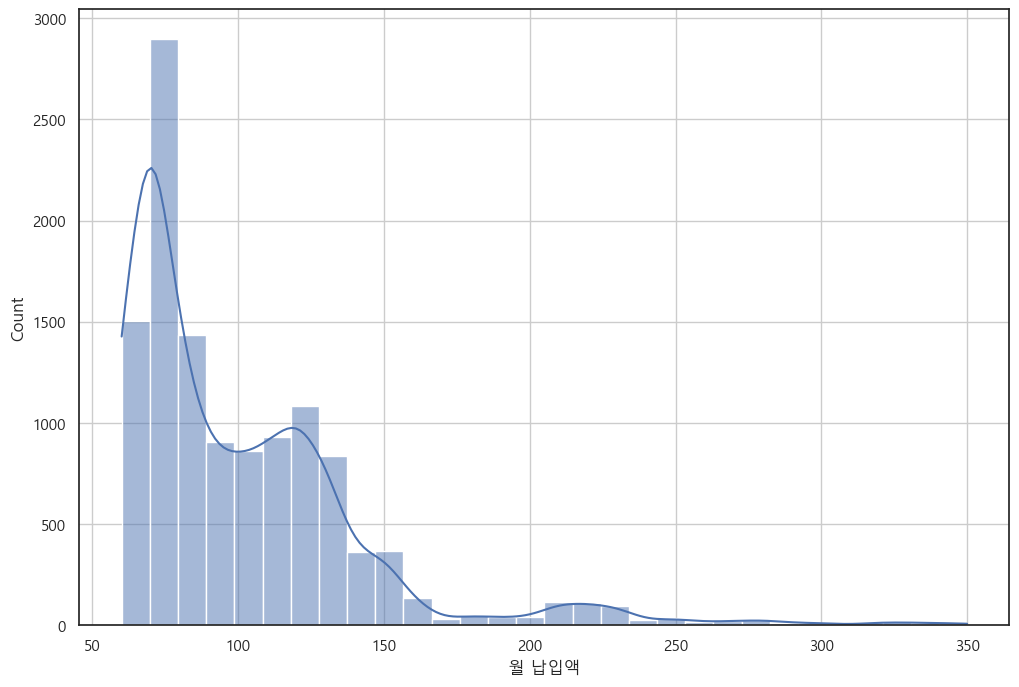

In [64]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['월 납입액'],bins=30,kde=True)
plt.grid()
plt.show()

In [65]:
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
feature = '월 납입액'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
월 납입액,12000.0,100.065833,42.45375,60.0,70.0,90.0,120.0,350.0


<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [242]:
tmp = data[['월 납입액','상품타입']]
tmp.groupby( by= '상품타입', as_index = False)['월 납입액'].mean()

# 기본

,상품타입,월 납입액
0,고급,149.934884
1,기본,86.705139
2,중급,112.029065


### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 crosstab으로 데이터 확인해보기

In [68]:
#[문제 25] '타상품 보유' 변수에 대해 범주별 비율을 확인하자.

data['타 상품 보유 현황'].value_counts(normalize = True).sort_index()

타 상품 보유 현황
1      0.356917
2      0.251417
3      0.128750
4이상    0.262917
Name: proportion, dtype: float64

In [208]:
pd.crosstab(index=data['타 상품 보유 현황'], columns=data['타 상품 보유 현황'])

타 상품 보유 현황,1,2,3,4이상
타 상품 보유 현황,,,,
1,4283,0,0,0
2,0,3017,0,0
3,0,0,1545,0
4이상,0,0,0,3155


In [80]:
# pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 1개만 가입한 사람보다 여러개를 가지고 있는 사람의 비율이 더 많다 > 패키지 상품을 준비한다
# 1개만 가입한 사람의 비율이 가장 높다 > 올인원 상품을 준비해 다른 고객층도 흡수한다.

#>> 올인원 상품은 이탈율 증가로 야기될 수 있음.

### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

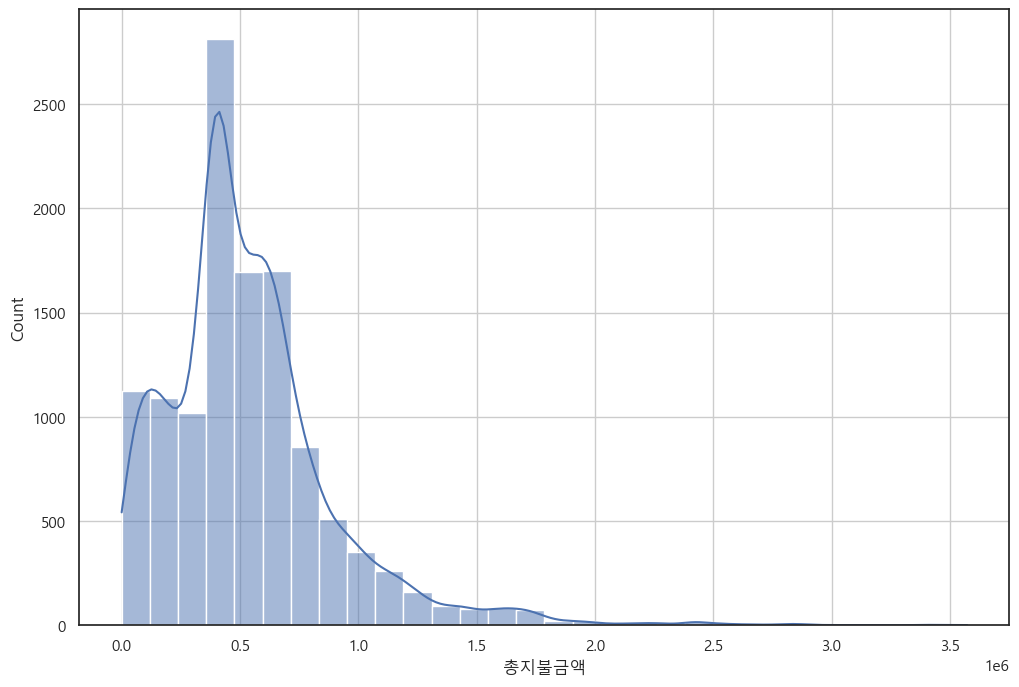

In [70]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['총지불금액'],bins=30,kde=True)
plt.grid()
plt.show()

In [71]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)

feature = '총지불금액'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
총지불금액,12000.0,535585.416667,358799.286205,0.0,336000.0,474000.0,679000.0,3573000.0


<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!